In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

%matplotlib inline

In [2]:
paths={'blue':'../ngc1087/hlsp_phangs-hst_hst_wfc3-uvis_ngc1087_f275w_v1_exp-drc-sci.fits','green':'../ngc1087/hlsp_phangs-hst_hst_wfc3-uvis_ngc1087_f438w_v1_exp-drc-sci.fits', 'red':'../ngc1087/hlsp_phangs-hst_hst_wfc3-uvis_ngc1087_f814w_v1_exp-drc-sci.fits'}

In [3]:
from astropy.visualization import simple_norm

def normalise_fits(fits_data, stretch='linear', percent=99.5):
    norm = simple_norm(fits_data, stretch=stretch ,percent=percent)
    normalized_data = norm(fits_data)
    
    return normalized_data

In [4]:
img={}
data, norm_data={}, {}
mean, median, std = {}, {}, {}

for key in paths:
    img[key]=fits.open(paths[key])
   
    data[key]=ma.masked_equal(img[key][0].data, 0)
    
    norm_data[key]=normalise_fits(data[key])
    mean[key], median[key], std[key] = sigma_clipped_stats(norm_data[key])
    
    img[key].close()

In [5]:
rgb_image = np.zeros((norm_data['blue'].shape[0], norm_data['blue'].shape[1], 3))
rgb_image[..., 0] = norm_data['red']  # Red channel
rgb_image[..., 1] = norm_data['green']  # Green channel
rgb_image[..., 2] = norm_data['blue']  # Blue channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


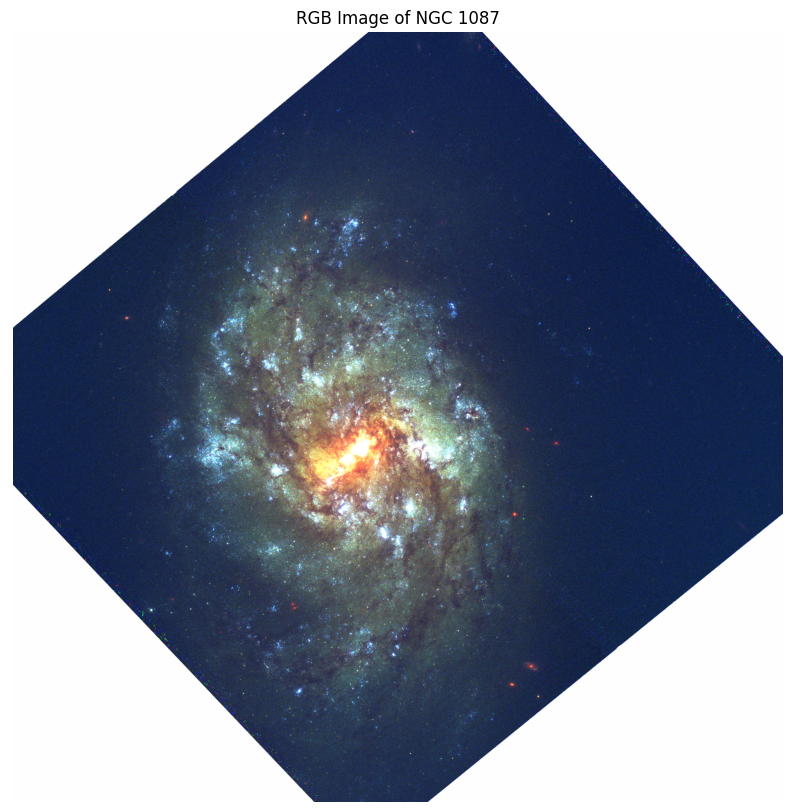

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(rgb_image[1500:6500, 1500:6500], origin='lower')
plt.title('RGB Image of NGC 1087')
plt.axis('equal')
plt.axis('off')
# plt.savefig('ngc1087_rgb.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()